# **IMPORTING THE DEPENDENCIES**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym
import torch
import time

# **LOADING THE ENVIRONMENT** 

In [ ]:
environment = gym.make("FrozenLake-v0", is_slippery=False)
environment.reset()
environment.render()


SFFF
FHFH
FFFH
HFFG


***ACTIONS***

◀️ LEFT = 0
🔽 DOWN = 1
▶️ RIGHT = 2
🔼 UP = 3

**STATE AND ACTION SPACE**

In [ ]:
number_of_states = environment.observation_space.n
number_of_actions = environment.action_space.n
print("State Space:",number_of_states)
print("Action Space:",number_of_actions)

State Space: 16
Action Space: 4


**DEFINING A FUNCTION FOR THE USER TO PLAY THE GAME**

In [ ]:
def human_play(env):
    '''
    Play games
    
    Inputs:
    env: OpenAI Gym environment
            env.P: dictionary
                    P[state][action] is list of tuples. Each tuple contains probability, nextstate, reward, terminal
                    probability: float
                    nextstate: int
                    reward: float
                    terminal: boolean
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    '''
    
    print('Action indices: LEFT=0, DOWN = 1, RIGHT = 2, UP = 3')
    state = env.reset()
    env.render()
    terminal = False
    steps=0
    while not terminal:
        steps=steps+1
        action = int(input('Give the environment your action index:'))
        state, reward, terminal, prob = env.step(action)
        print(reward)
        env.render()
    if (reward==1.0):
      print("YOU REACHED THE GOAL")
      print("you solved the game in ",steps," steps!!")
    else:
      print("Oops you lost! better luck next time")

# **PLAY THE GAME!**


In [ ]:
human_play(environment)

Action indices: LEFT=0, DOWN = 1, RIGHT = 2, UP = 3

SFFF
FHFH
FFFH
HFFG
Give the environment your action index:2
0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
Give the environment your action index:2
0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
Give the environment your action index:1
0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
Give the environment your action index:1
0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
Give the environment your action index:1
0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
Give the environment your action index:2
1.0
  (Right)
SFFF
FHFH
FFFH
HFFG
you reached the goal
you solved the game in  6  number of steps


# **RANDOM WALK**

In [ ]:
n, max_steps = 10000, 100
total_reward = 0
num_steps = []
for episode in range(n):
    observation = environment.reset()
    for i in range(max_steps):
        observation, reward, done, info = environment.step(environment.action_space.sample())
        if done: 
            total_reward += reward
            num_steps.append(i+1)
            break
environment.close()

# ***EVALUATING IT'S PERFORMANCE***

In [ ]:
print('Success Percentage = {0:.2f} %'.format(100*total_reward/n))
print('Average number of steps taken to reach the goal = {0:.2f}'.format(np.mean(num_steps)))

Success Percentage = 1.48 %
Average number of steps taken to reach the goal = 7.65


# **Q-LEARNING**

In [ ]:
# We re-initialize the Q-table
qtable = torch.zeros([environment.observation_space.n, environment.action_space.n])
print('Q-table before training:')
print(qtable)

Q-table before training:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


### **HYPER-PARAMETERS**

In [ ]:
total_episodes = 1000
gamma = 0.95
learning_rate = 0.6   # Alpha
egreedy = 0.9     #epsilon
egreedy_final = 0.1  #final 
egreedy_decay = 0.999   #decay rate

**HYPER-PARAMETER TUNING**

In [ ]:
gamma = 0.89
learning_rate = 0.99 # Alpha
egreedy = 0.7    #epsilon
egreedy_final = 0.08  #final epsilon 
egreedy_decay = 0.41   #decay rate'''

**ALGORITHM IMPLEMENTATION**

In [ ]:
steps_total = []
rewards_total = []
egreedy_total = []
for i_episode in range(total_episodes):
    
    # resets the environment
    state = environment.reset()
    step = 0

    while True:
        
        step += 1
        
        random_for_egreedy = torch.rand(1)[0]
        

        if random_for_egreedy > egreedy:      
            random_values = qtable[state] + torch.rand(1,number_of_actions) / 1000      
            action = torch.max(random_values,1)[1][0]  
            action = action.item()
        else:
            action = environment.action_space.sample()
            
        if egreedy > egreedy_final:
            egreedy *= egreedy_decay
        
        new_state, reward, done, info = environment.step(action)

        # Filling the Q Table
        qtable[state, action] = qtable[state, action]*(1-learning_rate) + learning_rate*(reward + gamma * torch.max(qtable[new_state]))
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        # time.sleep(0.4)
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(egreedy)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
            break
        


Episode: 0 Reward: 1.0 Steps Taken: 6
Episode: 10 Reward: 1.0 Steps Taken: 6
Episode: 20 Reward: 1.0 Steps Taken: 6
Episode: 30 Reward: 1.0 Steps Taken: 6
Episode: 40 Reward: 1.0 Steps Taken: 6
Episode: 50 Reward: 1.0 Steps Taken: 6
Episode: 60 Reward: 1.0 Steps Taken: 7
Episode: 70 Reward: 1.0 Steps Taken: 6
Episode: 80 Reward: 1.0 Steps Taken: 6
Episode: 90 Reward: 1.0 Steps Taken: 6
Episode: 100 Reward: 1.0 Steps Taken: 6
Episode: 110 Reward: 1.0 Steps Taken: 10
Episode: 120 Reward: 1.0 Steps Taken: 6
Episode: 130 Reward: 1.0 Steps Taken: 6
Episode: 140 Reward: 1.0 Steps Taken: 8
Episode: 150 Reward: 1.0 Steps Taken: 6
Episode: 160 Reward: 1.0 Steps Taken: 8
Episode: 170 Reward: 1.0 Steps Taken: 6
Episode: 180 Reward: 1.0 Steps Taken: 7
Episode: 190 Reward: 1.0 Steps Taken: 6
Episode: 200 Reward: 1.0 Steps Taken: 6
Episode: 210 Reward: 1.0 Steps Taken: 8
Episode: 220 Reward: 1.0 Steps Taken: 6
Episode: 230 Reward: 1.0 Steps Taken: 6
Episode: 240 Reward: 1.0 Steps Taken: 6
Episode: 2

# **Q-TABLE**

In [ ]:
print(qtable)

tensor([[0.4970, 0.4423, 0.5584, 0.4970],
        [0.4970, 0.0000, 0.6274, 0.5584],
        [0.5584, 0.7050, 0.5584, 0.6274],
        [0.6274, 0.0000, 0.5584, 0.0000],
        [0.4379, 0.0000, 0.0000, 0.4970],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7921, 0.0000, 0.6274],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6979, 0.0000],
        [0.0000, 0.7921, 0.0000, 0.0000],
        [0.7050, 0.8900, 0.0000, 0.7050],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7842, 0.8900, 0.6979],
        [0.7921, 0.8900, 1.0000, 0.7921],
        [0.0000, 0.0000, 0.0000, 0.0000]])


## **PERFORMANCE EVALUATION OF Q-LEARNING**

In [ ]:
print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/total_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/total_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

Percent of episodes finished successfully: 0.955
Percent of episodes finished successfully (last 100 episodes): 0.98
Average number of steps: 6.16
Average number of steps (last 100 episodes): 6.20


## **RESULTS**

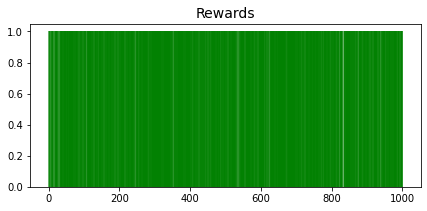

In [ ]:
plt.figure(figsize=(7,3))
plt.title("Rewards",size=14)
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()

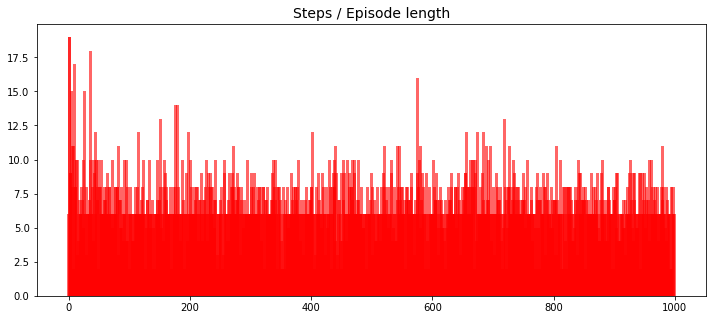

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Steps / Episode length",size=14)
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
plt.show()

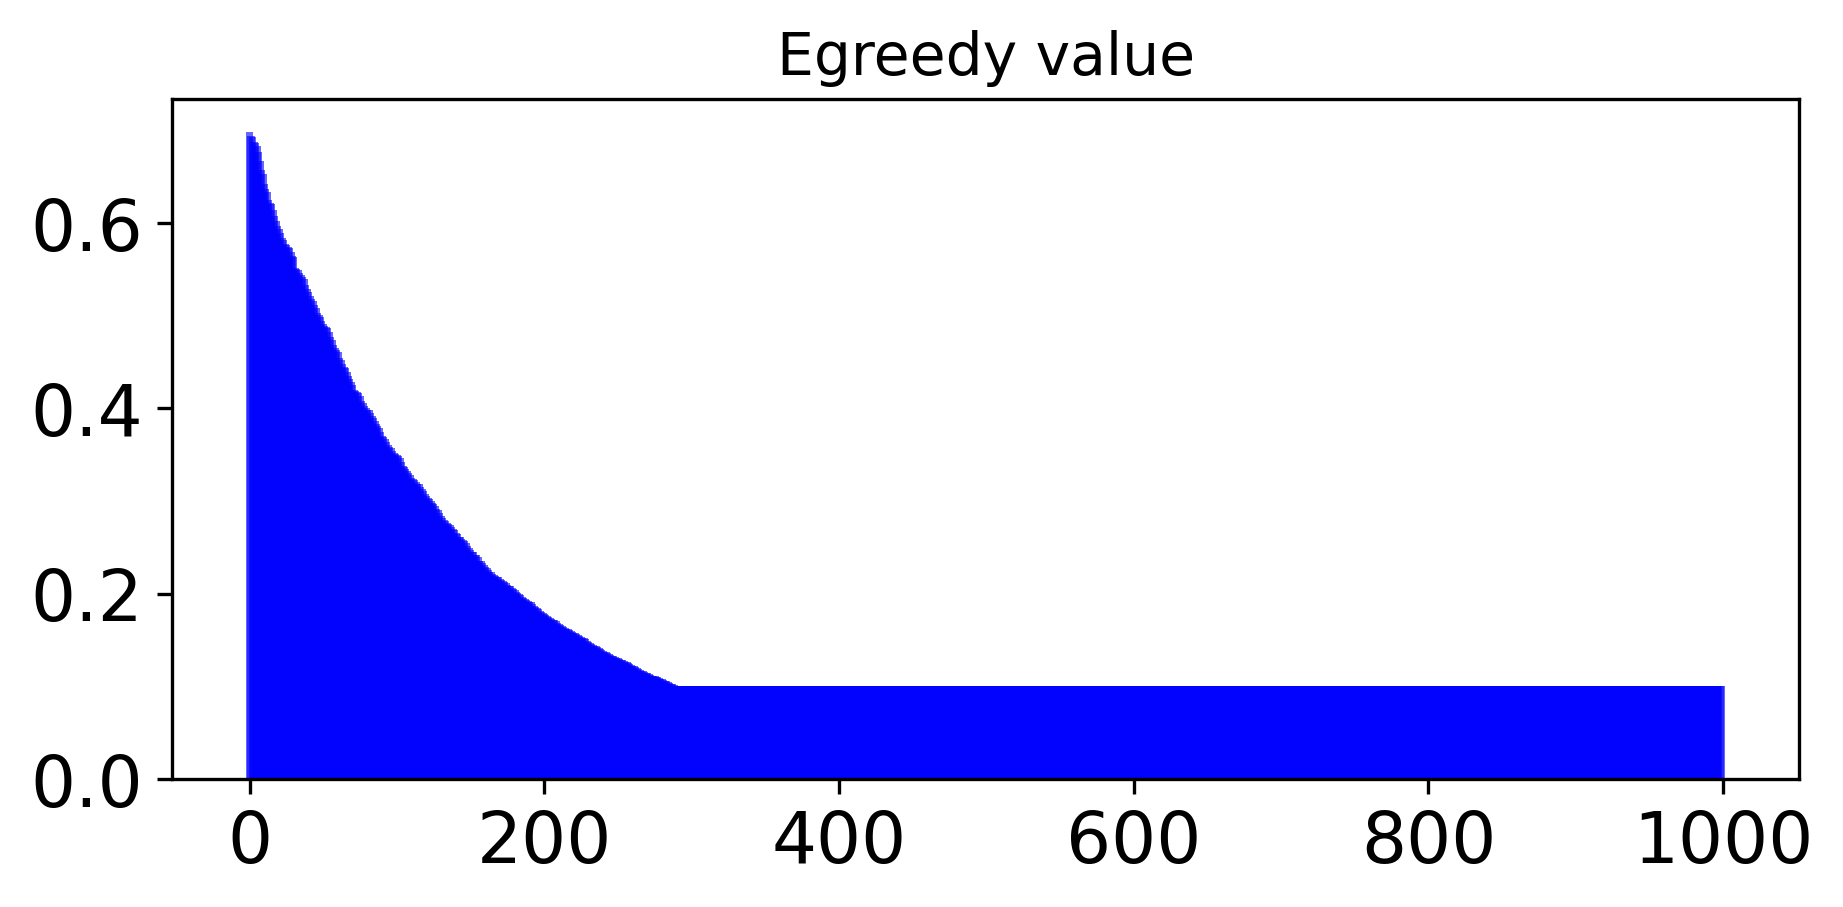

In [ ]:
plt.figure(figsize=(7,3))
plt.title("Egreedy value",size=14)
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue', width=5)
plt.show()

# **VISUALIZING THE AGENT PLAYING**

In [ ]:
from IPython.display import clear_output
import time 

state = environment.reset()
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

  (Right)
SFFF
FHFH
FFFH
HFFG
Sequence = [1, 1, 2, 1, 2, 2]
